In [1]:
#-----------------------------------------------------------------------#
#
# 
#
# Copyright (C) 2021 Andrés García-Serra Romero <alu0101451923@ull.edu.es>
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

#IMPORTING LIBRARIES:
import os
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import value,c,k,sigma,m_p,R
from mv_name import m_v_name
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


#PLOT-FORMAT:
plt.rc('font', size=35)          # controls default text sizes
plt.rc('axes', titlesize=35)     # fontsize of the axes title
plt.rc('axes', labelsize=35)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=35)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)    # fontsize of the tick labels

#DIRECTORIES:
datadir = 'tables/'
figdir = 'figures/'

In [2]:
# 0. Identify column variables:
files = os.listdir(datadir)                           # Read all text files in the folder
with open(datadir+files[0], "r") as file:             # Read the first line of a .dat table
    first_line = file.readline()
    for last_line in file:
        pass

with open(datadir+files[0], "r") as file:             # Read the first line of a .dat table
    first_line = file.readline()
    for last_line in file:
        pass
    
first_line = first_line.split()                       # Make the string line a string array
for i in range(0,len(first_line)-1):                  # Print the column number and variable
    print((i+1),first_line[i])

1 line
2 time
3 mass
4 lg(L)
5 lg(Teff)
6 1H_surf
7 4He_surf
8 12C_surf
9 13C_surf
10 14N_surf
11 16O_surf
12 17O_surf
13 18O_surf
14 20Ne_surf
15 22Ne_surf
16 26Al_surf
17 Mcc/Mt
18 lg(Teff)
19 lg(Md)
20 lg(rhoc)
21 lg(Tc)
22 1H_cen
23 4He_cen
24 12C_cen
25 13C_cen
26 14N_cen
27 16O_cen
28 17O_cen
29 18O_cen
30 20Ne_cen
31 22Ne_cen
32 26Al_cen
33 Omeg_surf
34 Omeg_cen
35 Rp/Req
36 Md/Md(0)
37 v_crit1
38 v_crit2
39 v_equa
40 Om/Om_cr
41 Gamma_Ed
42 lg(Mdot_mech)


M=5 Tms= 88.16277235312083 Myr
M=9 Tms= 26.25916048981315 Myr


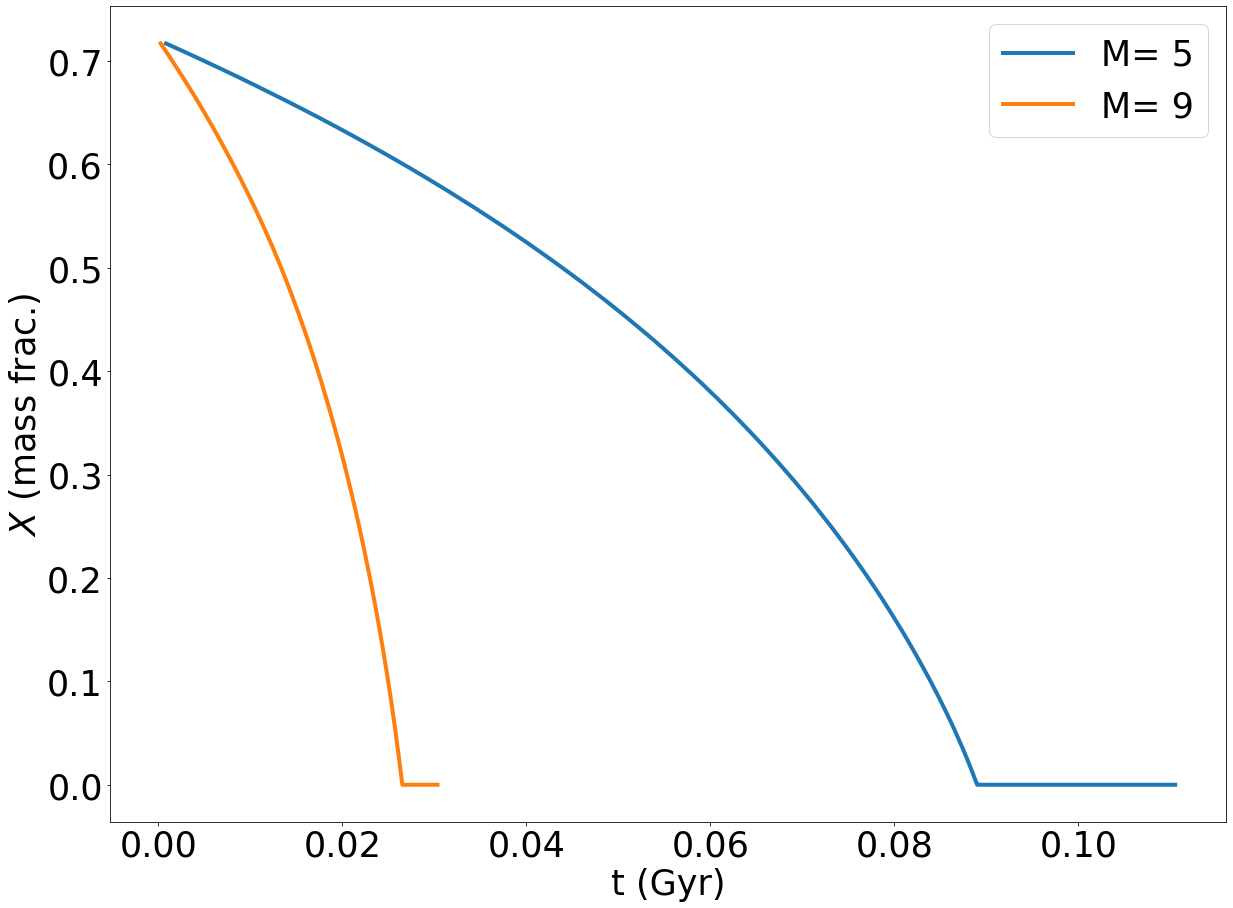

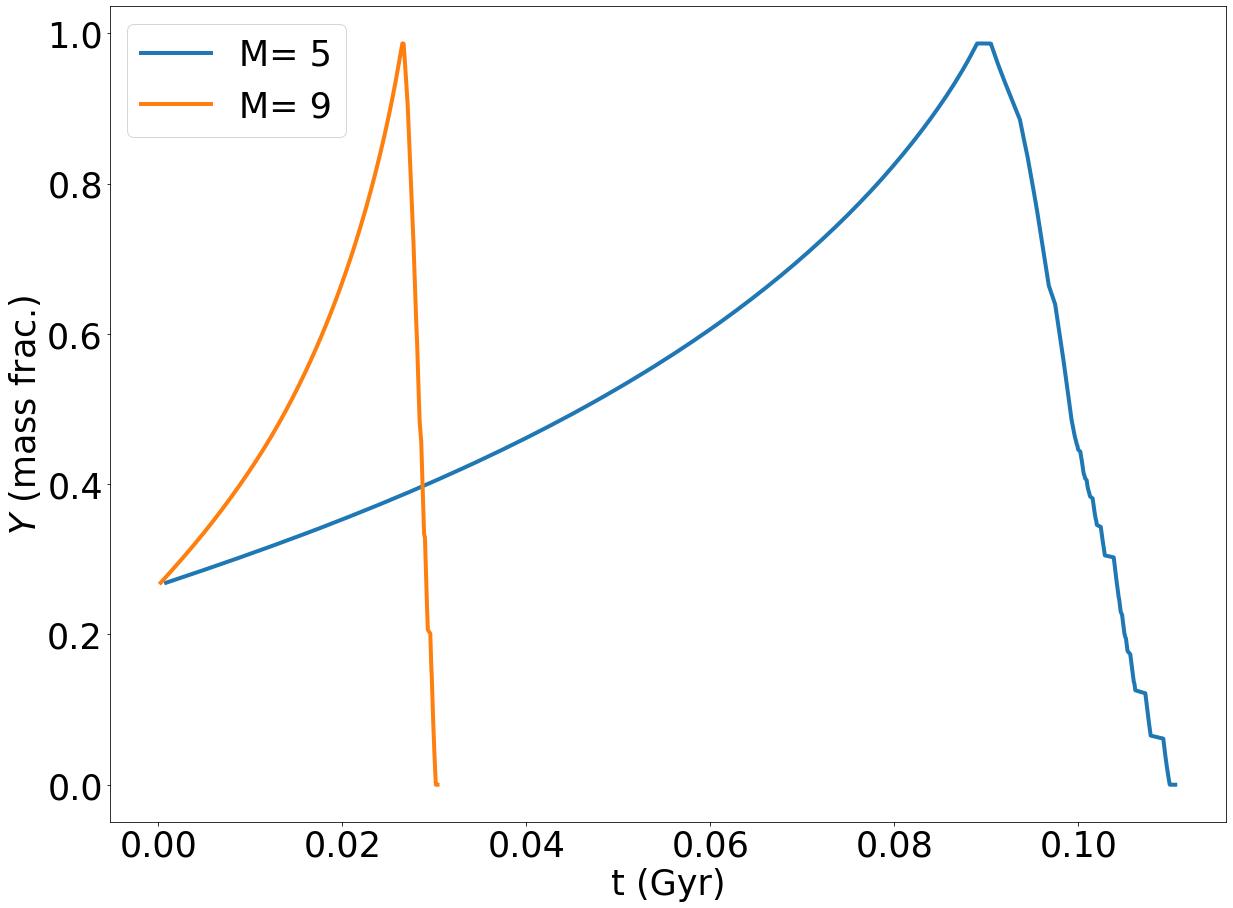

In [3]:
# 1 y 2. Abundance in time of H and He in 5 and 9 solar mass stars:
fivemsol = []
ninemsol = []
plotlines = ['k-','r-','k--','r--']

    #H Abundance:
plt.figure(figsize=(20,15))
for name in files:
    m,v=m_v_name(name)
    if (m=='5' or m=='9')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        time = data[:,1]*(10**-9)
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Minpos = np.where(x < 0.001)[0][0]
        print('M='+m+' Tms=',(time[Minpos]-time[0])*(10**3),'Myr')
        plt.plot(time,Xcen,linewidth=4,label='M= '+m)
        
plt.legend()
plt.xlabel('t (Gyr)')
plt.ylabel(r'$X$'+' (mass frac.)')
plt.savefig(figdir+'Hvariation.png',bbox_inches='tight',dpi=300)



    # He Abundance
plt.figure(figsize=(20,15))
for name in files:
    m,v=m_v_name(name)
    if (m=='5' or m=='9')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        time = data[:,1]*(10**-9)
        Xcen = data[:,22]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Minpos = np.where(x < 0.001)[0][0]
        plt.plot(time,Xcen,linewidth=4,label='M= '+m)
        
plt.legend()
plt.xlabel('t (Gyr)')
plt.ylabel(r'$Y$'+' (mass frac.)')
plt.savefig(figdir+'Hevariation.png',bbox_inches='tight',dpi=300)


In [4]:
# 3. HR diagram evolution:
plt.figure(figsize=(20,20))
tag = []
Lzams = []

for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        tag.append(m+r'$M_{\odot}$')
        label = m+r'$M_{\odot}$'
        Lzams.append(Lz)
        Tzams.append(Tz)
        plt.plot(lgTeff,lgL,linewidth=4,label='m='+m+' '+r' $ \ M_\odot$')
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.07, Lz+0.05), fontsize=30)
plt.legend(fontsize=25,ncol=2)
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.xlim([3.5,4.8])
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass.png',bbox_inches='tight',dpi=300)

NameError: name 'Tzams' is not defined

<Figure size 1440x1440 with 0 Axes>

No handles with labels found to put in legend.


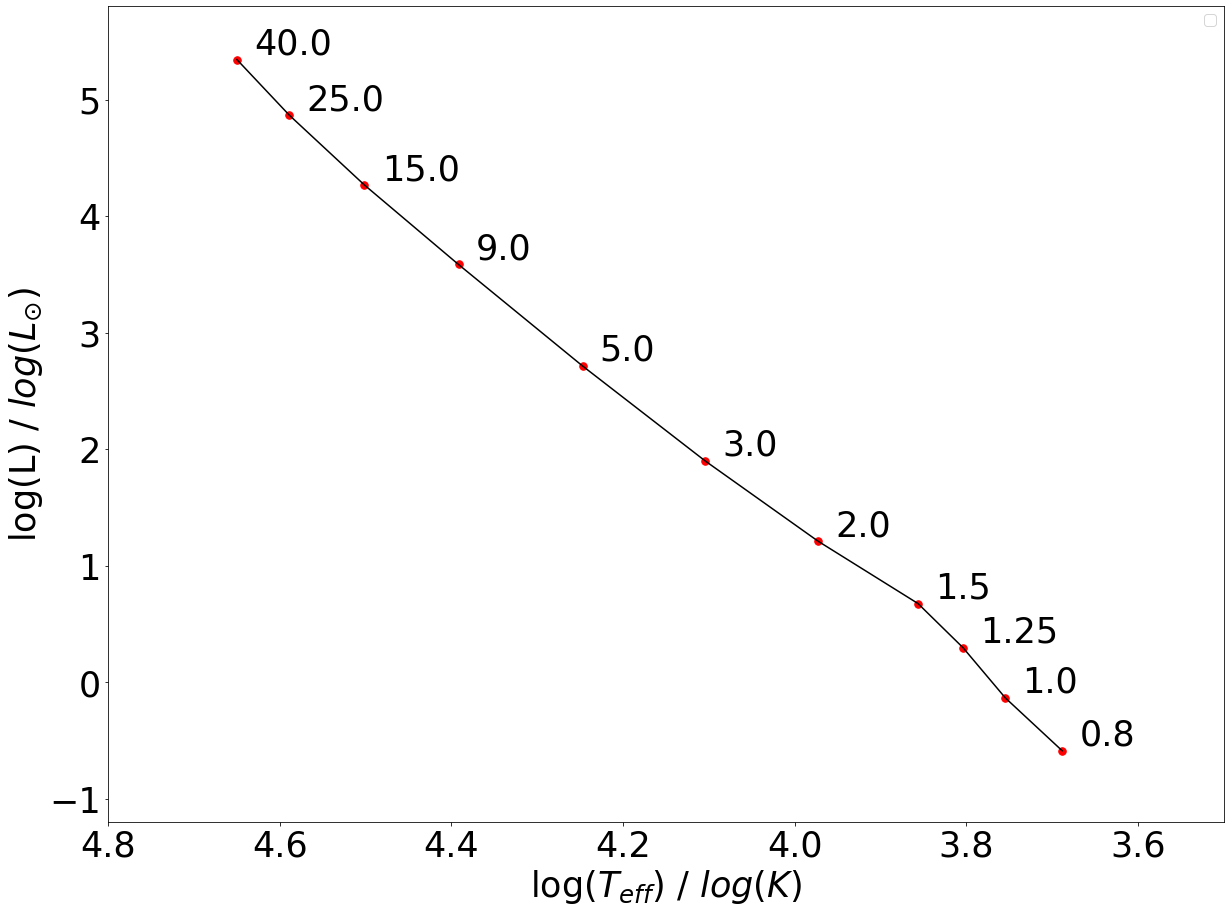

In [5]:
# 4. ZAMS diagram:
plt.figure(figsize=(20,15))
Lzams = []
Tzams = []
tag = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lz = lgL[0]
        lgTeff = data[:,4]
        Tz = lgTeff[0]
        tag.append(m+r'$M_{\odot}$')
        masses.append(m)
        Lzams.append(Lz)
        Tzams.append(Tz)
masses = np.array(masses).astype(float)
masses = np.sort(masses)
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
for i, txt in enumerate(masses):
    plt.annotate(txt, (Tzams[i],Lzams[i]),xytext=(Tzams[i]-0.02, Lzams[i]+0.05))
plt.plot(Tzams,Lzams,'r.',ms=15)
plt.plot(Tzams,Lzams,'k-',ms=10)
plt.legend(fontsize=15,ncol=2)
plt.xlim([3.5,4.8])
plt.ylim([-1.2,5.8])
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.gca().invert_xaxis()
plt.savefig(figdir+'HR_zams.png',bbox_inches='tight',dpi=300)


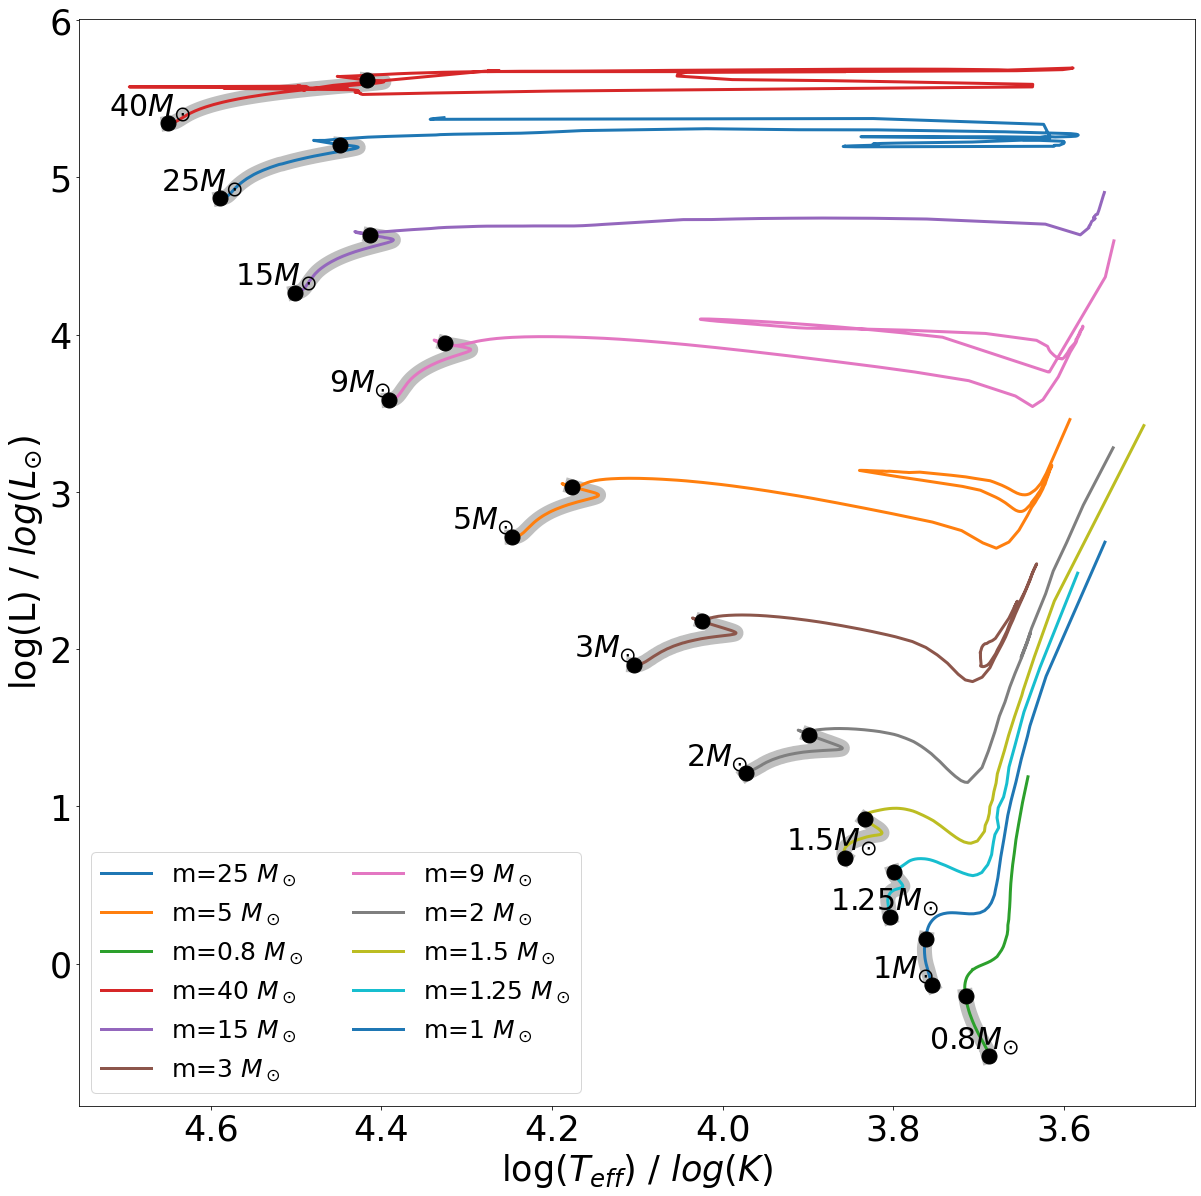

In [6]:
# 4. HR with MS highlighted:
plt.figure(figsize=(20,20))
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        label = m+r'$M_{\odot}$'
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        plt.plot(Tms,Lms,'k-',linewidth=15,alpha=0.25)
        plt.plot(lgTeff,lgL,linewidth=3,label='m='+m+' '+r'$M_\odot$')
        plt.plot(Tms[-1],Lms[-1],'ko',ms=15)
        plt.plot(Tms[0],Lms[0],'ko',ms=15)
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.07, Lz+0.05), fontsize=30)
plt.legend(fontsize=25,ncol=2)
plt.xlabel('log($T_{eff}$) / $log(K)$')
plt.ylabel('log(L) / $log(L_{\odot})$')
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass_ms_highlight.png',bbox_inches='tight',dpi=300)

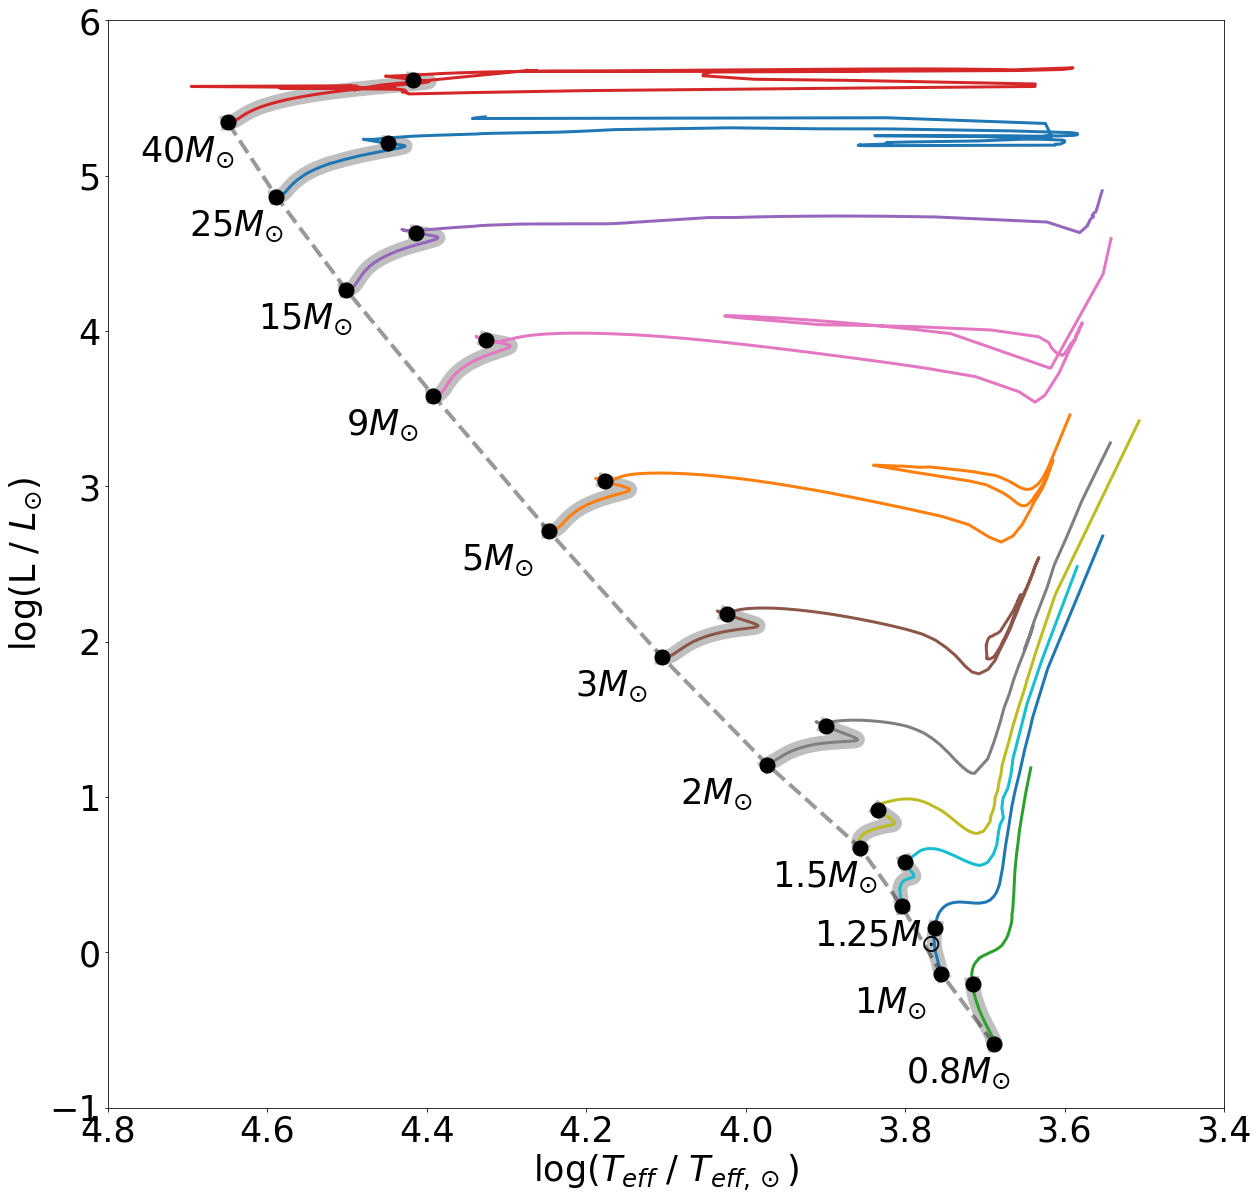

In [7]:
# 4b. HR diagram with ZAMS line indicator:
Lzams = []
Tzams = []
plt.figure(figsize=(20,20))
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        label = m+r'$M_{\odot}$'
        Xcen = data[:,21]
        Lzams.append(Lz)
        Tzams.append(Tz)
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        plt.plot(Tms,Lms,'k-',linewidth=15,alpha=0.25)
        plt.plot(lgTeff,lgL,linewidth=3,label='m='+m+' '+r'$M_\odot$')
        plt.plot(Tms[-1],Lms[-1],'ko',ms=15)
        plt.plot(Tms[0],Lms[0],'ko',ms=15)
        plt.annotate(label,(Tz,Lz),xytext=(Tz+0.11, Lz-0.25), fontsize=35)
        
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
plt.plot(Tzams,Lzams,'k--',linewidth=4,alpha=0.4)
#plt.legend(fontsize=25,ncol=2)
#plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$ / $T_{eff,\odot}$)')
plt.ylabel('log(L / $L_{\odot}$)')
plt.ylim([-1,6])
plt.xlim([3.4,4.8])
plt.gca().invert_xaxis()
plt.savefig(figdir+'HRsolarmass_ms_highlight.png',bbox_inches='tight',dpi=300)

In [11]:
# 5. Age of stars at ZAMS:
i=0
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        age = data[:,1][0]*10**(-6)
        i=i+1
        print(i,'Tzmas =',age,'Myrs , '+'M='+m+' Msol')

1 Tzmas = 0.0597345415896223 Myrs , M=25 Msol
2 Tzmas = 0.833150100617788 Myrs , M=5 Msol
3 Tzmas = 74.783887 Myrs , M=0.8 Msol
4 Tzmas = 0.036448106719858896 Myrs , M=40 Msol
5 Tzmas = 0.117777499809661 Myrs , M=15 Msol
6 Tzmas = 2.85885871879294 Myrs , M=3 Msol
7 Tzmas = 0.24943536756015197 Myrs , M=9 Msol
8 Tzmas = 9.1497740222557 Myrs , M=2 Msol
9 Tzmas = 15.987447792331 Myrs , M=1.5 Msol
10 Tzmas = 27.428258 Myrs , M=1.25 Msol
11 Tzmas = 44.870332 Myrs , M=1 Msol


In [14]:
# 6. Age of stars when leaving MS:
i=0
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        age = data[:,1][Xminpos]*10**(-6)
        i=i+1
        print(i,'Tzmas =',age,'Myrs , '+'M='+m+' Msol')

1 Tzmas = 6.36385435568967 Myrs , M=25 Msol
2 Tzmas = 88.9959224537386 Myrs , M=5 Msol
3 Tzmas = 21552.716 Myrs , M=0.8 Msol
4 Tzmas = 4.47253457502368 Myrs , M=40 Msol
5 Tzmas = 11.133265161688199 Myrs , M=15 Msol
6 Tzmas = 323.213340244056 Myrs , M=3 Msol
7 Tzmas = 26.5085958573733 Myrs , M=9 Msol
8 Tzmas = 1017.03591402358 Myrs , M=2 Msol
9 Tzmas = 2239.1831892217897 Myrs , M=1.5 Msol
10 Tzmas = 4232.9717 Myrs , M=1.25 Msol
11 Tzmas = 8525.3631 Myrs , M=1 Msol


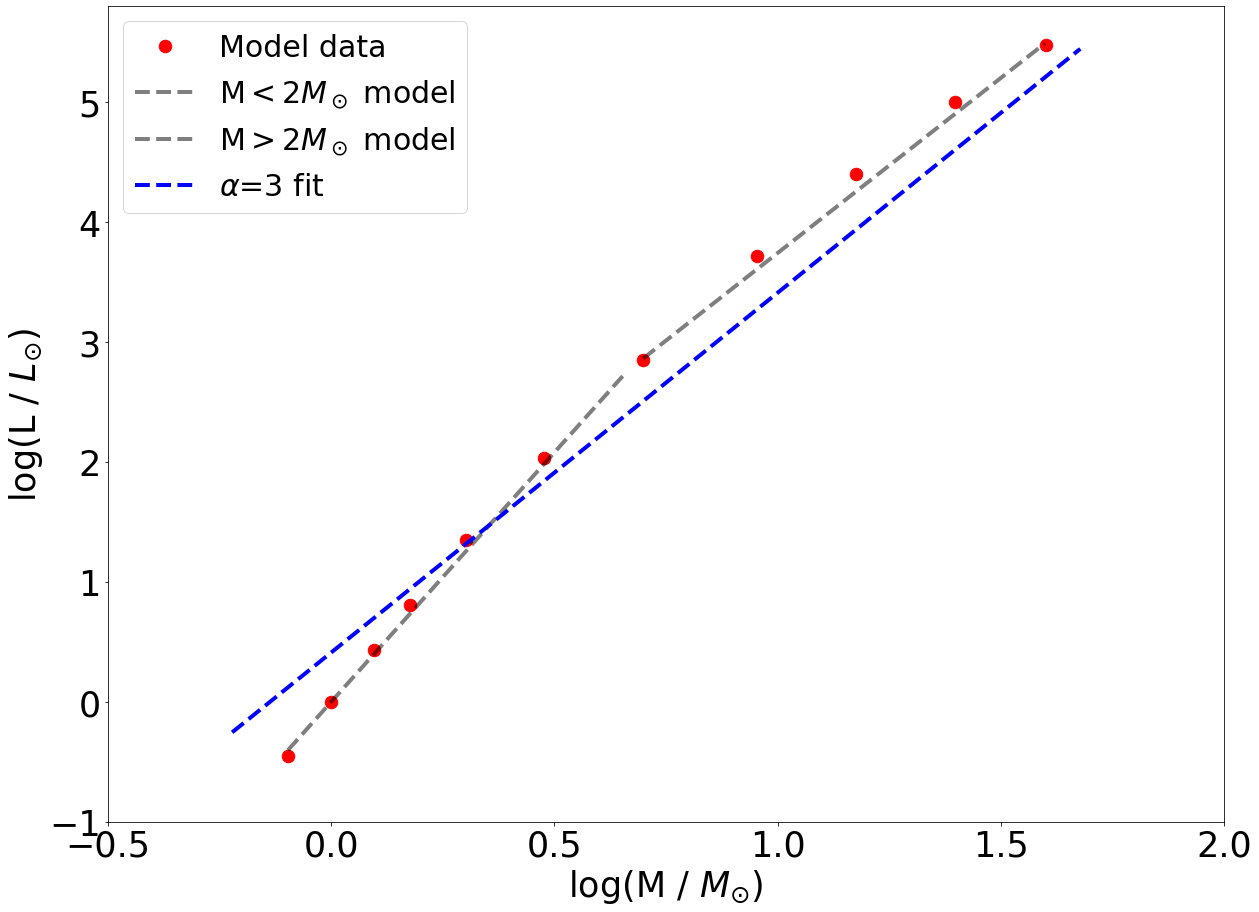

In [11]:
# 7. L-M for stars in ZAMS
plt.figure(figsize=(20,15))
Lzams = []
Mzams = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lz = lgL[0]
        M = data[:,2]
        Mz = M[0]
        Lzams.append(Lz)
        Mzams.append(Mz)
        if (m=='1'):
            Lo=Lz

    #General data plot:
Mzams = np.log10(Mzams)
Lzams = Lzams - Lo
plt.plot(Mzams,Lzams,'r.',ms=25,label='Model data')

    #L-M model plot:
M = np.arange(np.log10(0.8),np.log10(5),0.05)
Lm = 4.16*M
plt.plot(M,Lm,'k--',linewidth=4,alpha=0.5,label='M$<$2$M_\odot$ model')
M = np.arange(np.log10(5),np.log10(40),0.05)
Lm = 2.92*M-6*Lo
plt.plot(M,Lm,'k--',linewidth=4,alpha=0.5,label='M$>$2$M_\odot$ model')
M = np.arange(np.log10(0.6),np.log10(50),0.05)
Lm = 3*M-3*Lo
plt.plot(M,Lm,'b--',linewidth=4,label=r'$\alpha$=3 fit')

plt.legend(fontsize=30)
plt.xlabel('log(M / $M_{\odot}$)')
plt.ylabel('log(L / $L_{\odot}$)')
plt.ylim([-1,5.8])
plt.xlim([-0.5,2])
plt.savefig(figdir+'L-M_zams.png',bbox_inches='tight',dpi=300)

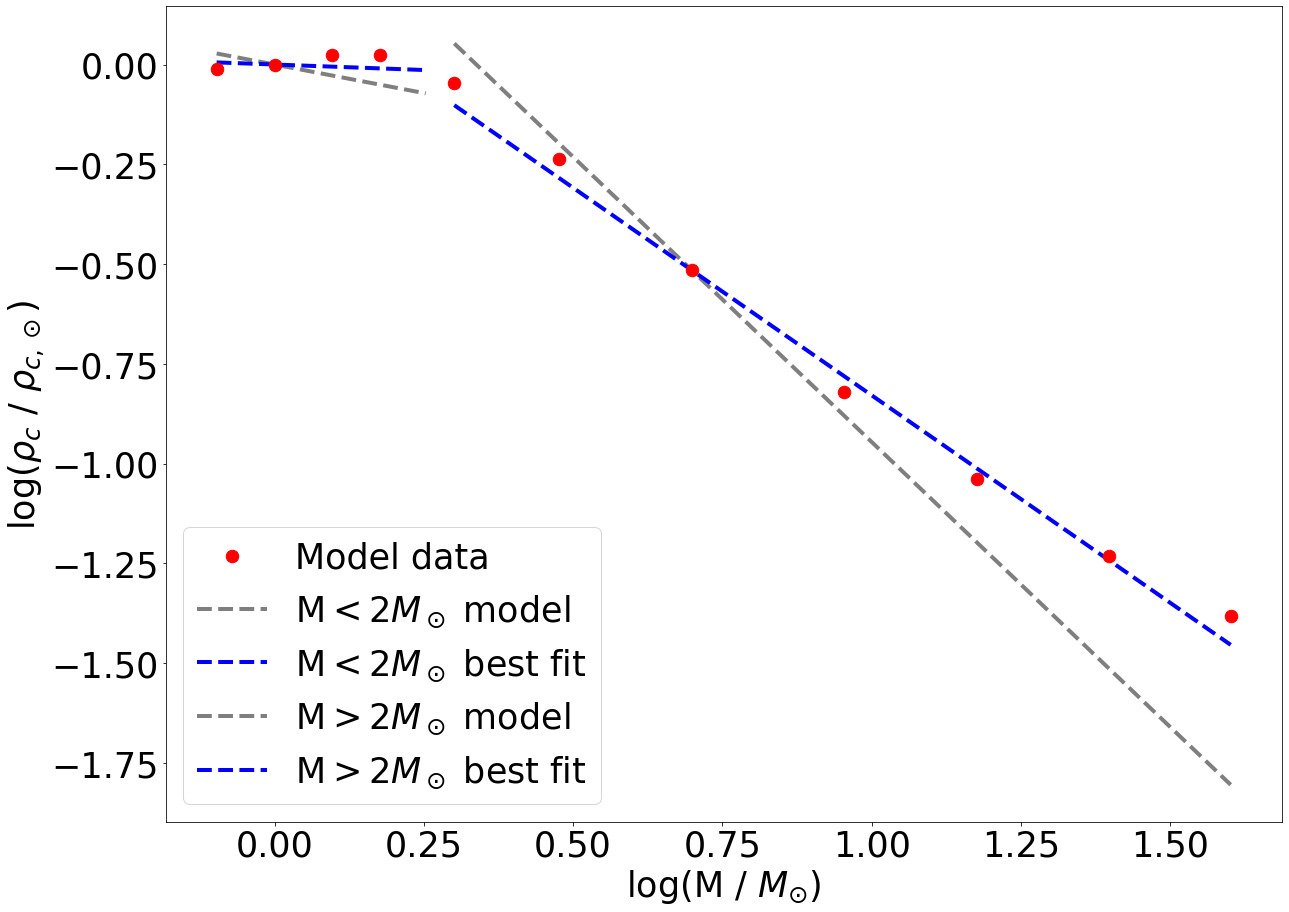

In [12]:
# 8. RHOc-M for stars in ZAMS
plt.figure(figsize=(20,15))
RHOzams = []
Mzams = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgRHO = data[:,19]
        RHOz = lgRHO[0]
        M = data[:,2]
        Mz = M[0]
        RHOzams.append(RHOz)
        Mzams.append(Mz)
        if (m=='1'):
            RHOo=RHOz
        if (m=='5'):
            RHO5=RHOz            

    #General data plot:
Mzams = np.log10(Mzams)
RHOzams = RHOzams-RHOo
plt.plot(Mzams,RHOzams,'r.',ms=25,label='Model data',zorder=1)

    #p-p chain model plot:
M = np.arange(np.log10(0.8),np.log10(2),0.05)
RHOpp = (-2/7)*M
plt.plot(M,RHOpp,'k--',linewidth=4,alpha=0.5,label='M$<$2$M_\odot$ model',zorder=-1)
M = np.arange(np.log10(0.8),np.log10(2),0.05)
RHOpp = (-0.055)*M
plt.plot(M,RHOpp,'b--',linewidth=4,label='M$<$2$M_\odot$ best fit',zorder=-1)
    #CNO cycle model plot (M=5M0 scale):
M = np.arange(np.log10(2),np.log10(40),0.05)
RHOcno = (-10/7)*(M-np.log10(5))-RHOo+RHO5
plt.plot(M,RHOcno,'k--',linewidth=4,alpha=0.5,label='M$>$2$M_\odot$ model',zorder=-1)
M = np.arange(np.log10(2),np.log10(40),0.05)
RHOcno = (-1.04)*(M-np.log10(5))-RHOo+RHO5
plt.plot(M,RHOcno,'b--',linewidth=4,label='M$>$2$M_\odot$ best fit',zorder=-1)
    #Plot format:
plt.legend(fontsize=35,loc='lower left')
plt.xlabel('log(M / $M_{\odot}$)')
plt.ylabel(r'log($\rho_c \ / \ \rho_{c,\odot}$)')
plt.savefig(figdir+'rho-M_zams.png',bbox_inches='tight',dpi=300)

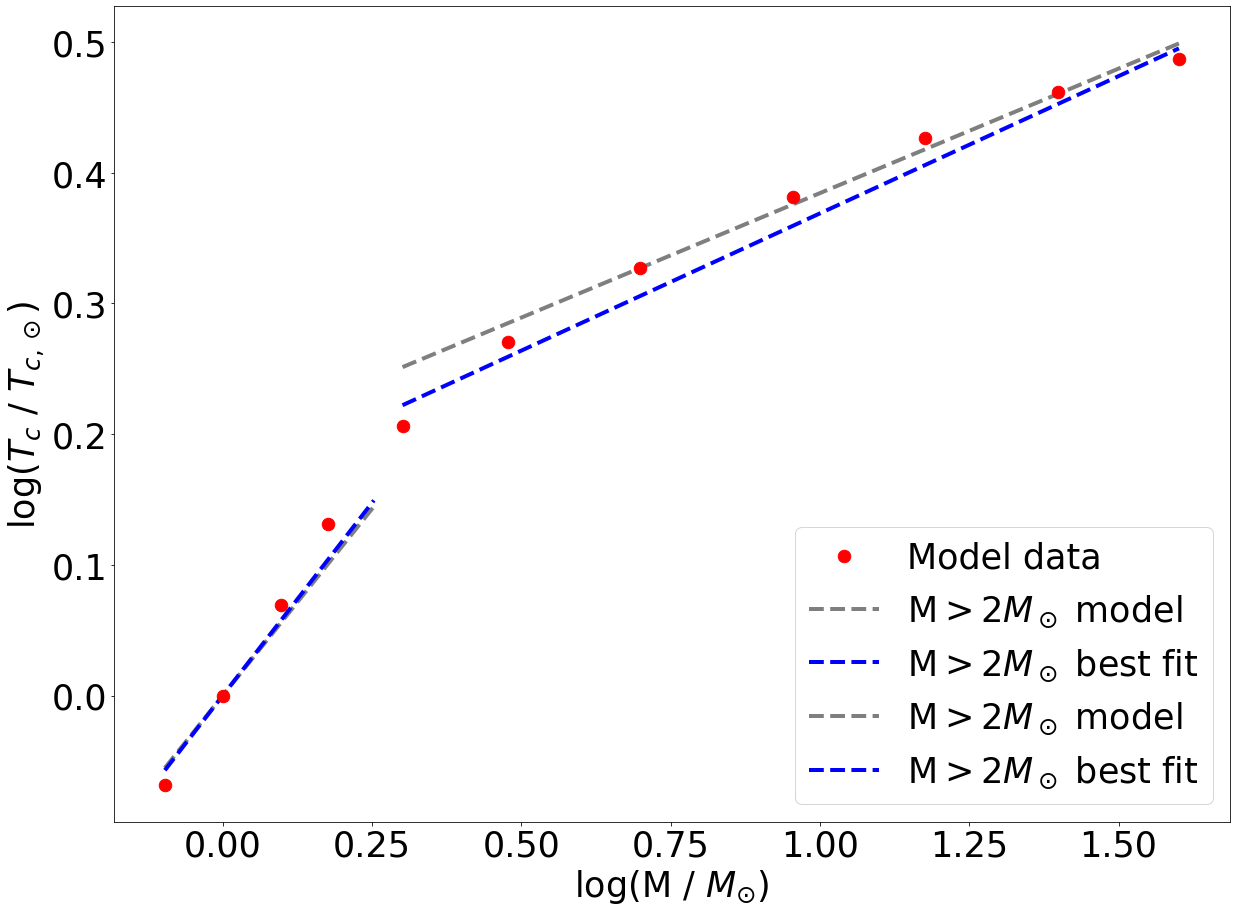

In [13]:
# 9. Tc-M for stars in ZAMS
plt.figure(figsize=(20,15))
Tzams = []
Mzams = []
masses = []
for name in files:
    m,v=m_v_name(name)
    if (m=='0.8' or m=='1' or m=='1.25' or m=='1.5'
        or m=='2' or m=='3' or m=='5' or m=='9' or m=='15' or m=='25' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgTc = data[:,20]
        Tz = lgTc[0]
        M = data[:,2]
        Mz = M[0]
        masses.append(m)
        Tzams.append(Tz)
        Mzams.append(Mz)
        if (m=='1'):
            To=Tz
        if (m=='5'):
            T5=Tz   
            
    #General data plot:
Mzams = np.log10(Mzams)
Tzams = Tzams - To
plt.plot(Mzams,Tzams,'r.',ms=25,label='Model data',zorder=1)

    #p-p chain model plot:
M =  np.arange(np.log10(0.8),np.log10(2),0.05)
Tpp = (4/7)*M
plt.plot(M,Tpp,'k--',linewidth=4,alpha=0.5,label='M$>$2$M_\odot$ model',zorder=-1)
M =  np.arange(np.log10(0.8),np.log10(2),0.05)
Tpp = (0.59)*M
plt.plot(M,Tpp,'b--',linewidth=4,label='M$>$2$M_\odot$ best fit',zorder=-1)

    #CNO cycle model plot (M=5M0 scale):
M = np.arange(np.log10(2),np.log10(40),0.05)
Tcno = (4/21)*(M-np.log10(5))-To+T5
plt.plot(M,Tcno,'k--',linewidth=4,alpha=0.5,label='M$>$2$M_\odot$ model',zorder=-1)
M = np.arange(np.log10(2),np.log10(40),0.05)
Tcno = (0.21)*(M-np.log10(5))-1.003*To+T5
plt.plot(M,Tcno,'b--',linewidth=4,label='M$>$2$M_\odot$ best fit',zorder=-1)

    #Plot format:
plt.legend(fontsize=35,loc='lower right')
plt.xlabel('log(M / $M_{\odot}$)')
plt.ylabel(r'log($T_c \ / \ T_{c,\odot}$)')
plt.savefig(figdir+'T-M_zams.png',bbox_inches='tight',dpi=300)

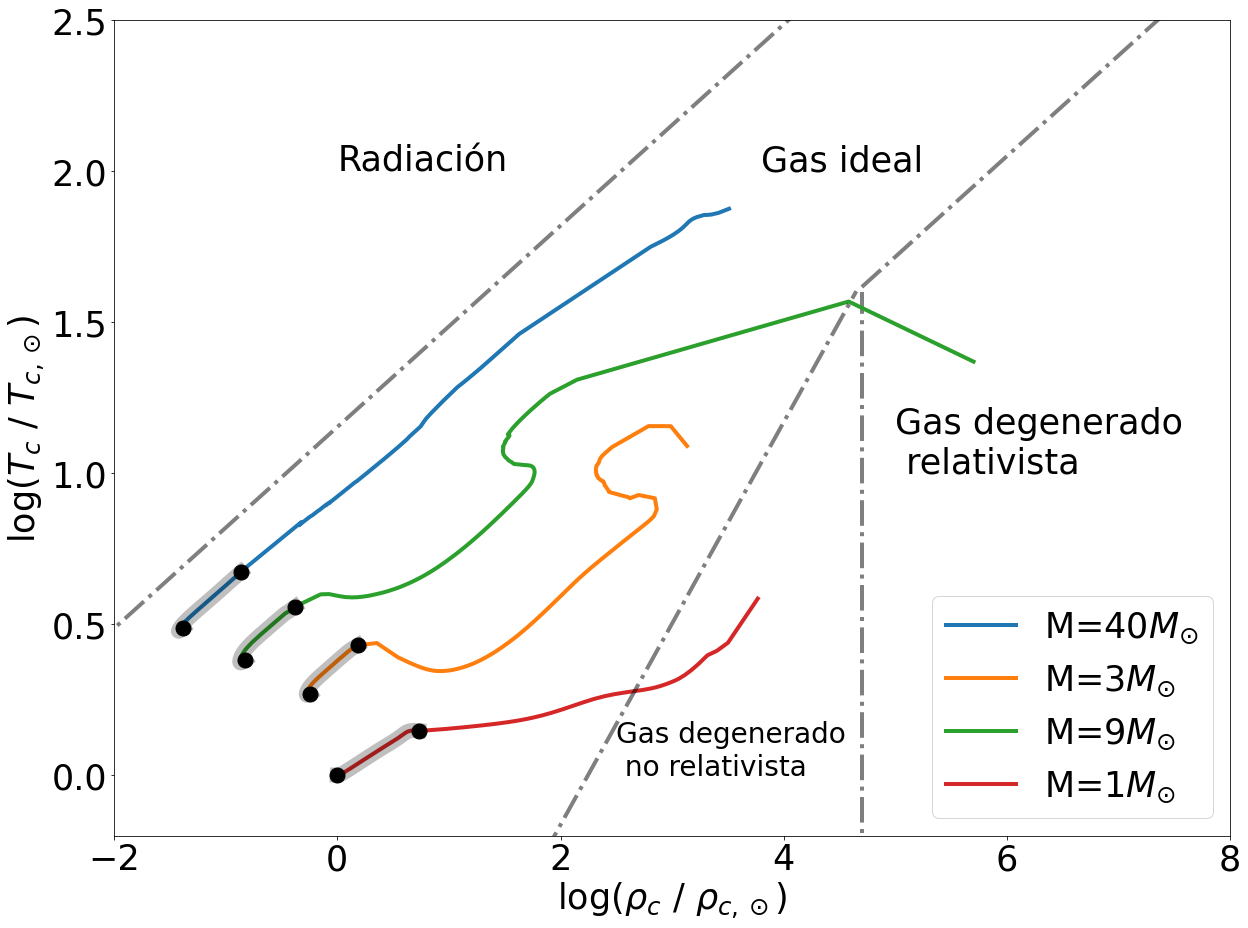

In [14]:
# 9. Tc-M for stars in ZAMS
plt.figure(figsize=(20,15))
for name in files:
    m,v=m_v_name(name)
    if(m=='1'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgTc = data[:,20]
        To = lgTc[0]
        RHOc = data[:,19]
        RHOo = RHOc[0]
    if (m=='1' or m=='3' or m=='9' or m=='40')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgTc = data[:,20]-To
        RHOc = data[:,19]-RHOo
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        RHOms = RHOc[0:Xminpos]
        lgTcms = lgTc[0:Xminpos]
        plt.plot(RHOc,lgTc,linewidth=4,label='M='+m+'$M_{\odot}$')
        plt.plot(RHOms,lgTcms,'k-',linewidth=15,alpha=0.25)
        plt.plot(RHOms[-1],lgTcms[-1],'ko',ms=15)
        plt.plot(RHOms[0],lgTcms[0],'ko',ms=15)

# Plotting limit lines:
    #First line:
rho = np.arange(-10,8,0.05)
T = (1/3)*rho+(1/3)*np.log10((3*k*c)/(4*sigma*2*value('helion mass')))+(1/3)*RHOo-To+1.4
plt.plot(rho,T,'k-.',linewidth=4,alpha=0.5)
    #Second line:
K1 = 10**7
K2 = 1.24*10**10
rho = np.arange(-10,4.7,0.05)
T = (2/3)*rho+np.log10((K1*2*value('helion mass'))/(k))+(5/3)*np.log10(0.5)+(2/3)*RHOo-To+1
plt.plot(rho,T,'k-.',linewidth=4,alpha=0.5)
    #Third line:
K1 = 10**7
K2 = 1.24*10**10
rho = np.arange(4.7,8,0.05)
T = (1/3)*rho+0.05
plt.plot(rho,T,'k-.',linewidth=4,alpha=0.5)
    #Fourth line:
plt.vlines(x=4.7,ymin=-1,ymax=1.6,color='k',linestyle='-.',alpha=0.5,linewidth=4)


#Anotaciones:
tag = ['Radiación','Gas ideal','Gas degenerado \n relativista']
ycoord = [2,2,1]
xcoord = [0,3.8,5]
for i in range(0,3):
    plt.annotate(tag[i],(xcoord[i],ycoord[i]),fontsize=35)
plt.annotate('Gas degenerado \n no relativista',(2.5,0),fontsize=28)
plt.legend(fontsize=35,loc='lower right')
plt.ylabel(r'log($T_c \ / \ T_{c,\odot}$)')
plt.xlabel(r'log($\rho_c \ / \ \rho_{c,\odot}$)')
plt.xlim([-2,8])
plt.ylim([-0.2,2.5])
plt.savefig(figdir+'rho-T_MS.png',bbox_inches='tight',dpi=300)

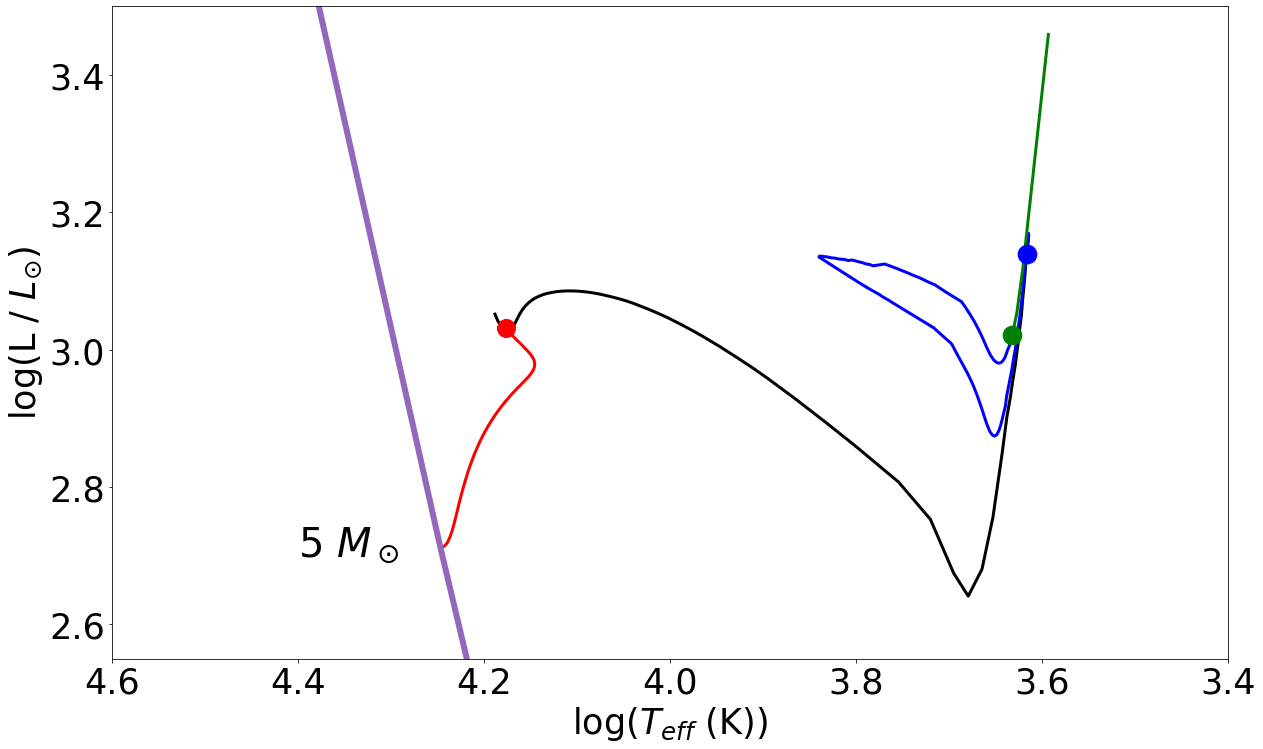

In [105]:
# 11. Diagram imitator:
Lzams = []
Tzams = []
plt.figure(figsize=(20,12))

for name in files:
    m,v=m_v_name(name)
    if (m=='1')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lo = lgL[0]
        
for name in files:
    m,v=m_v_name(name)
    if (m=='3' or m=='5' or m=='9')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        Lzams.append(Lz)
        Tzams.append(Tz)
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
plt.plot(Tzams,Lzams,'tab:purple',linewidth=6)

for name in files:
    m,v=m_v_name(name)
    if (m=='5')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Ccen = data[:,23]
        Ccenlist = Ccen.flatten().tolist()
        x = np.array(Ccenlist)
        Cminpos = np.where(x > 0.001)[0][0]
        Hecen = data[:,22]
        Hecenlist = Hecen.flatten().tolist()
        x = np.array(Hecenlist)
        Heminpos = np.where(x < 0.001)[0][0]
        Xcen = data[:,21]
        lgTeff = data[:,4]
        lgL = data[:,3]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        plt.plot(Tms,Lms,'r-',linewidth=3,zorder=1)
        plt.plot(lgTeff[Xminpos:Cminpos],lgL[Xminpos:Cminpos],'k',linewidth=3,zorder=-1)
        plt.plot(lgTeff[Cminpos:Heminpos],lgL[Cminpos:Heminpos],'b',linewidth=3,zorder=-1)
        plt.plot(lgTeff[Heminpos-1:-1],lgL[Heminpos-1:-1],'g',linewidth=3,zorder=-1)
        plt.plot(Tms[-1],Lms[-1],'ro',ms=18,zorder=-1)
plt.annotate('5 $M_\odot$',(4.4,2.7), fontsize=40,zorder=-1)
plt.scatter(lgTeff[Cminpos-1],lgL[Cminpos-1],c='b',s=350,zorder=1)
plt.scatter(lgTeff[Heminpos-1],lgL[Heminpos-1],c='g',s=350,zorder=1)
#plt.legend(fontsize=25,ncol=2)
#plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$ (K))')
plt.ylabel('log(L / $L_{\odot}$)')
plt.ylim([2.55,3.5])
plt.xlim([3.4,4.6])
plt.gca().invert_xaxis()
plt.savefig(figdir+'L-T_final.png',bbox_inches='tight',dpi=300)

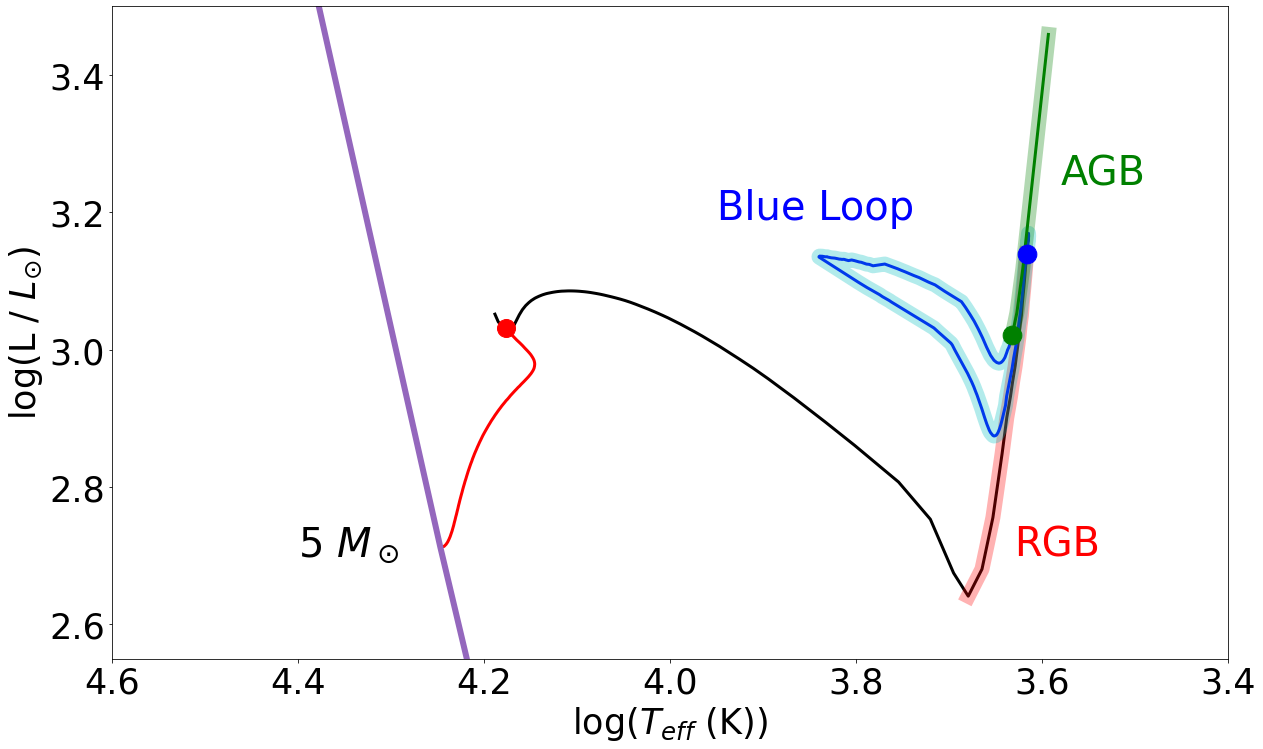

In [104]:
# 11. Diagram imitator:
Lzams = []
Tzams = []
plt.figure(figsize=(20,12))

for name in files:
    m,v=m_v_name(name)
    if (m=='1')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        Lo = lgL[0]
        
for name in files:
    m,v=m_v_name(name)
    if (m=='3' or m=='5' or m=='9')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        lgL = data[:,3]
        lgTeff = data[:,4]
        Lz = lgL[0]
        Tz = lgTeff[0]
        Lzams.append(Lz)
        Tzams.append(Tz)
Tzams = np.sort(Tzams)
Lzams = np.sort(Lzams)
plt.plot(Tzams,Lzams,'tab:purple',linewidth=6)

for name in files:
    m,v=m_v_name(name)
    if (m=='5')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Ccen = data[:,23]
        Ccenlist = Ccen.flatten().tolist()
        x = np.array(Ccenlist)
        Cminpos = np.where(x > 0.001)[0][0]
        Hecen = data[:,22]
        Hecenlist = Hecen.flatten().tolist()
        x = np.array(Hecenlist)
        Heminpos = np.where(x < 0.001)[0][0]
        Xcen = data[:,21]
        lgTeff = data[:,4]
        lgL = data[:,3]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Lms = lgL[0:Xminpos]
        Tms = lgTeff[0:Xminpos]
        lgLlist = lgL.flatten().tolist()
        pos = lgLlist.index(lgL.min())
        plt.plot(Tms,Lms,'r-',linewidth=3,zorder=1)
        plt.plot(lgTeff[Xminpos:Cminpos],lgL[Xminpos:Cminpos],'k',linewidth=3,zorder=-1)
        plt.plot(lgTeff[pos:Cminpos],lgL[pos:Cminpos],'r',linewidth=15,zorder=-1,alpha=0.3)
        plt.plot(lgTeff[Cminpos:Heminpos],lgL[Cminpos:Heminpos],'b',linewidth=3,zorder=-1)
        plt.plot(lgTeff[Cminpos:Heminpos],lgL[Cminpos:Heminpos],'c',linewidth=15,zorder=-1,alpha=0.3)
        plt.plot(lgTeff[Heminpos-1:-1],lgL[Heminpos-1:-1],'g',linewidth=3,zorder=-1)
        plt.plot(lgTeff[Heminpos-1:-1],lgL[Heminpos-1:-1],'g',linewidth=15,zorder=-1,alpha=0.3)
        plt.plot(Tms[-1],Lms[-1],'ro',ms=18,zorder=-1)
plt.annotate('5 $M_\odot$',(4.4,2.7), fontsize=40,zorder=-1)
plt.annotate('RGB',(3.63,2.7),color='r',fontsize=40,zorder=-1)
plt.annotate('Blue Loop',(3.95,3.19),color='b',fontsize=40,zorder=-1)
plt.annotate('AGB',(3.58,3.24),color='g',fontsize=40,zorder=-1)
plt.scatter(lgTeff[Cminpos-1],lgL[Cminpos-1],c='b',s=350,zorder=1)
plt.scatter(lgTeff[Heminpos-1],lgL[Heminpos-1],c='g',s=350,zorder=1)
#plt.legend(fontsize=25,ncol=2)
#plt.title(r'HR diagram at different masses')
plt.xlabel('log($T_{eff}$ (K))')
plt.ylabel('log(L / $L_{\odot}$)')
plt.ylim([2.55,3.5])
plt.xlim([3.4,4.6])
plt.gca().invert_xaxis()
plt.savefig(figdir+'L-T_final_highlight.png',bbox_inches='tight',dpi=300)

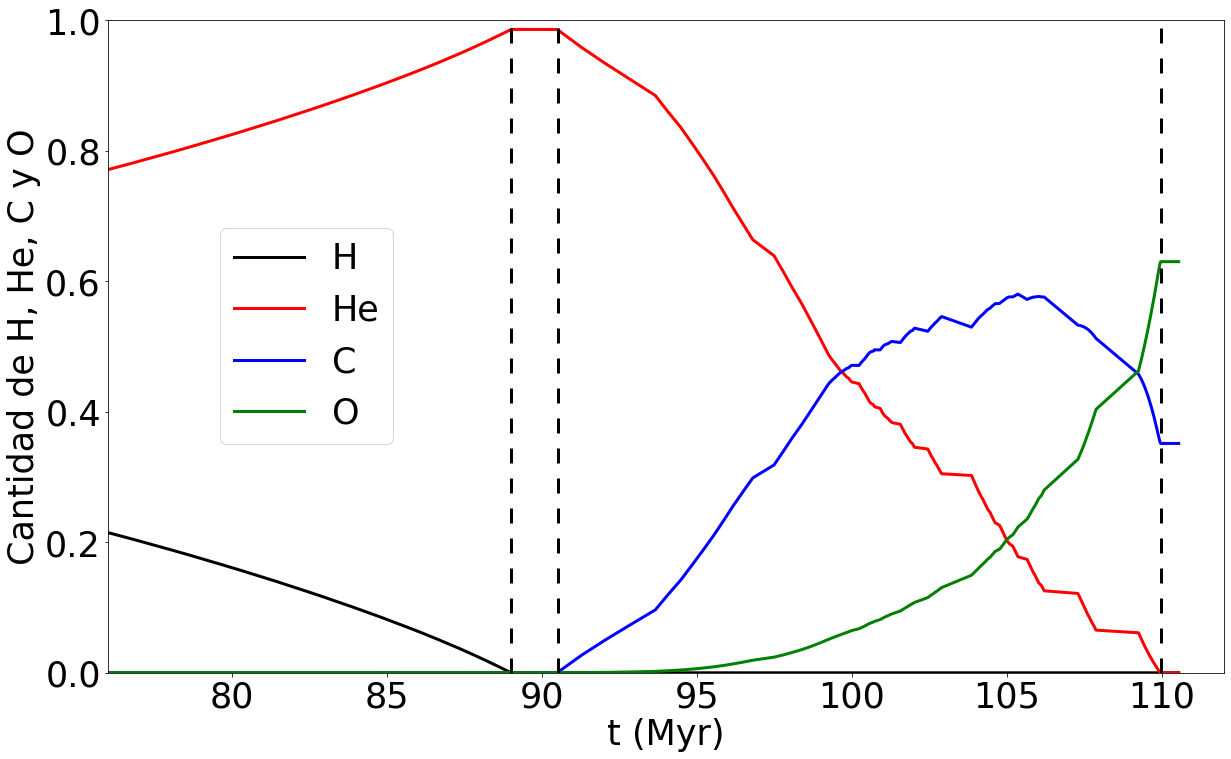

In [70]:
Lzams = []
Tzams = []
plt.figure(figsize=(20,12))
for name in files:
    m,v=m_v_name(name)
    if (m=='5')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Ccen = data[:,23]
        Ccenlist = Ccen.flatten().tolist()
        x = np.array(Ccenlist)
        Cminpos = np.where(x > 0.001)[0][0]
        Hecen = data[:,22]
        Hecenlist = Hecen.flatten().tolist()
        x = np.array(Hecenlist)
        Heminpos = np.where(x < 0.001)[0][0]
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        t = data[:,1]*10**(-6)
        Ocen = data[:,26]
        plt.plot(t,Xcen,'k',linewidth=3,label='H')
        plt.plot(t,Hecen,'r',linewidth=3,label='He')
        plt.plot(t,Ccen,'b',linewidth=3,label='C')
        plt.plot(t,Ocen,'g',linewidth=3,label='O')
        plt.axvline(x=t[Xminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3)
        plt.axvline(x=t[Heminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3)
        plt.axvline(x=t[Cminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3)
plt.annotate('5 $M_\odot$',(4.4,2.7), fontsize=40,zorder=-1)
plt.legend(fontsize=35,loc=[0.1,0.35])
plt.xlabel('t (Myr)')
plt.ylabel('Cantidad de H, He, C y O')
plt.ylim([0,1])
plt.xlim([76,112])
plt.savefig(figdir+'Ab-t_final.png',bbox_inches='tight',dpi=300)

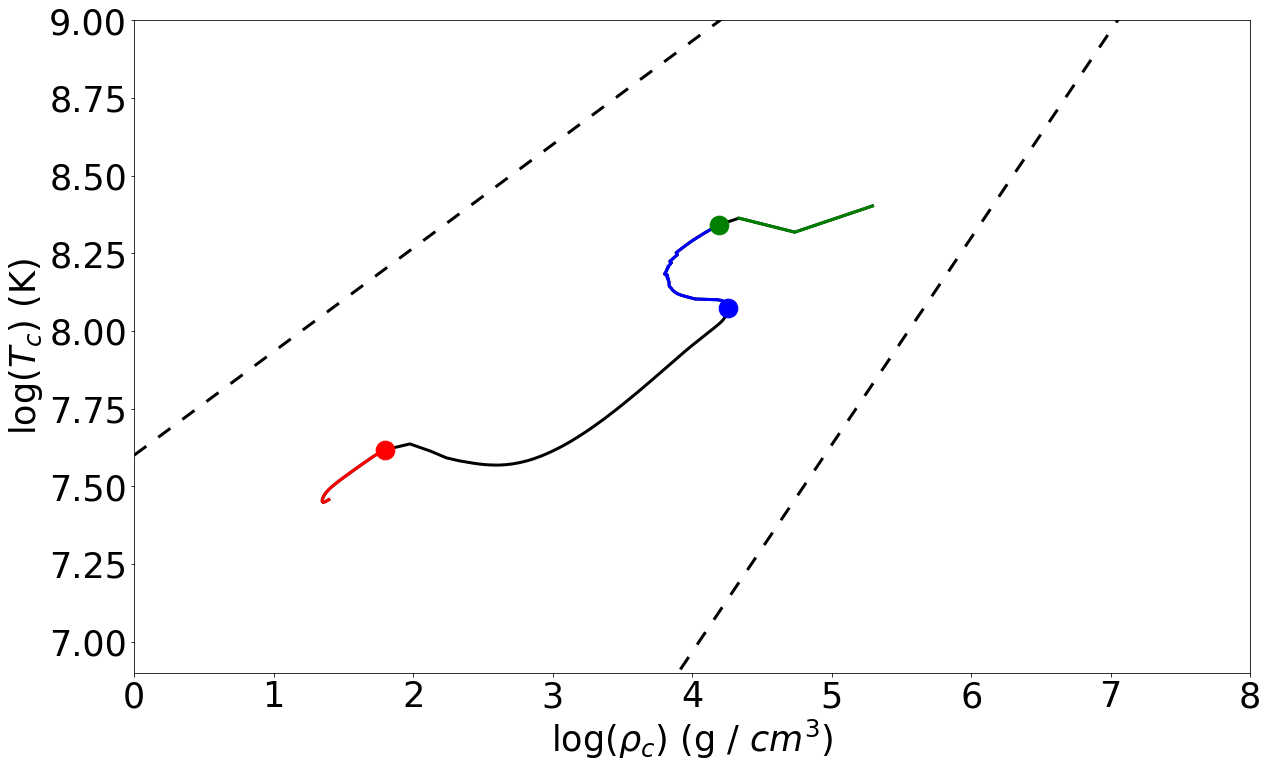

In [69]:
Lzams = []
Tzams = []
plt.figure(figsize=(20,12))
for name in files:
    m,v=m_v_name(name)
    if (m=='5')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Ccen = data[:,23]
        Ccenlist = Ccen.flatten().tolist()
        x = np.array(Ccenlist)
        Cminpos = np.where(x > 0.001)[0][0]
        Hecen = data[:,22]
        Hecenlist = Hecen.flatten().tolist()
        x = np.array(Hecenlist)
        Heminpos = np.where(x < 0.001)[0][0]
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        Tc = data[:,20]
        rhoc = data[:,19]
        plt.plot(rhoc,Tc,'k',linewidth=3,zorder=-1)
        plt.plot(rhoc[0:Xminpos],Tc[0:Xminpos],'r',linewidth=3,zorder=-1)
        plt.plot(rhoc[Cminpos:Heminpos],Tc[Cminpos:Heminpos],'b',linewidth=3,zorder=-1)
        plt.plot(rhoc[Heminpos:-1],Tc[Heminpos:-1],'g',linewidth=3,zorder=-1)
        plt.scatter(rhoc[Xminpos-1],Tc[Xminpos-1],c='r',s=350,zorder=1)
        plt.scatter(rhoc[Cminpos-1],Tc[Cminpos-1],c='b',s=350,zorder=1)
        plt.scatter(rhoc[Heminpos-1],Tc[Heminpos-1],c='g',s=350,zorder=1)
        x=np.arange(0,20,0.05)
        y = x*(1/3)+7.6
        plt.plot(x,y,color='k',linestyle='--',dashes=(5, 5),linewidth=3)
        y = x*(2/3)+4.3
        plt.plot(x,y,color='k',linestyle='--',dashes=(5, 5),linewidth=3)      
plt.ylabel('log($T_c$) (K)')
plt.xlabel(r'log($\rho_c$) (g / $cm^{3}$)')
plt.ylim([6.9,9])
plt.xlim([0,8])
plt.savefig(figdir+'T-rho_final.png',bbox_inches='tight',dpi=300)

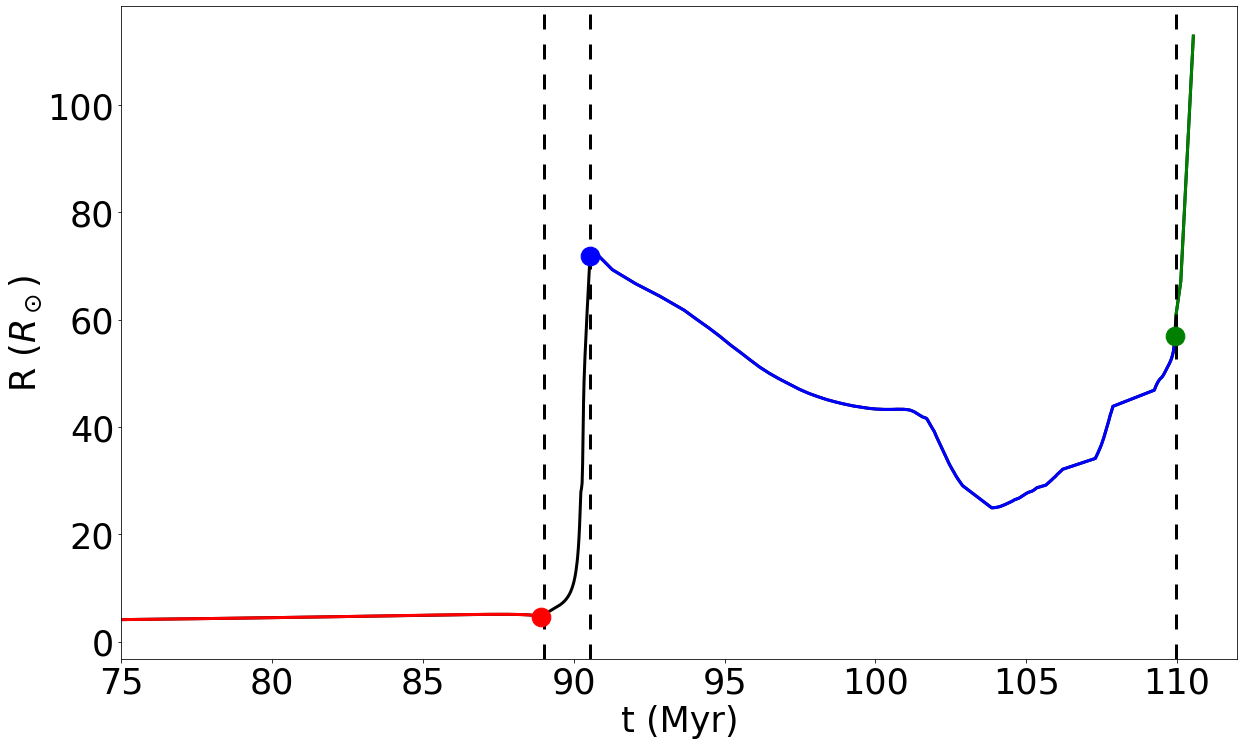

In [73]:
Lzams = []
Tzams = []
plt.figure(figsize=(20,12))
for name in files:
    m,v=m_v_name(name)
    if (m=='1')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        To = data[:,4][0]
        
for name in files:
    m,v=m_v_name(name)
    if (m=='5')and(v=='0'):
        data = np.loadtxt(datadir+name,skiprows=3)
        Ccen = data[:,23]
        Ccenlist = Ccen.flatten().tolist()
        x = np.array(Ccenlist)
        Cminpos = np.where(x > 0.001)[0][0]
        Hecen = data[:,22]
        Hecenlist = Hecen.flatten().tolist()
        x = np.array(Hecenlist)
        Heminpos = np.where(x < 0.001)[0][0]
        Xcen = data[:,21]
        Xcenlist = Xcen.flatten().tolist()
        x = np.array(Xcenlist)
        Xminpos = np.where(x < 0.001)[0][0]
        lgTeff = data[:,4]-To
        lgL = data[:,3]
        t = data [:,1]*10**(-6)
        lgL = np.array(lgL)
        lgTeff = np.array(lgTeff)
        R = (10**lgL)**(1/2)*(10**lgTeff)**(-2)
        plt.plot(t,R,'k',linewidth=3,zorder=-1)
        plt.plot(t[0:Xminpos],R[0:Xminpos],'r',linewidth=3,zorder=-1)
        plt.plot(t[Cminpos:Heminpos],R[Cminpos:Heminpos],'b',linewidth=3,zorder=-1)
        plt.plot(t[Heminpos:-1],R[Heminpos:-1],'g',linewidth=3,zorder=-1)
        plt.scatter(t[Xminpos-1],R[Xminpos-1],c='r',s=350,zorder=1)
        plt.scatter(t[Cminpos],R[Cminpos],c='b',s=350,zorder=1)
        plt.scatter(t[Heminpos-1],R[Heminpos-1],c='g',s=350,zorder=1) 
        plt.axvline(x=t[Xminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3,zorder=-1)
        plt.axvline(x=t[Heminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3,zorder=-1)
        plt.axvline(x=t[Cminpos],color='k',linestyle='--',dashes=(5, 5),linewidth=3,zorder=-1)
plt.ylabel('R ($R_\odot$)')
plt.xlabel('t (Myr)')
plt.xlim([75,112])
plt.savefig(figdir+'R-t_final.png',bbox_inches='tight',dpi=300)

169